In [1]:
# Loading 
import glob 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, hilbert, chirp
from itertools import islice 
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import scale, normalize
from scipy.signal import welch
import torch
from scipy.stats import kurtosis
import antropy as ant

1
10_110011.npy


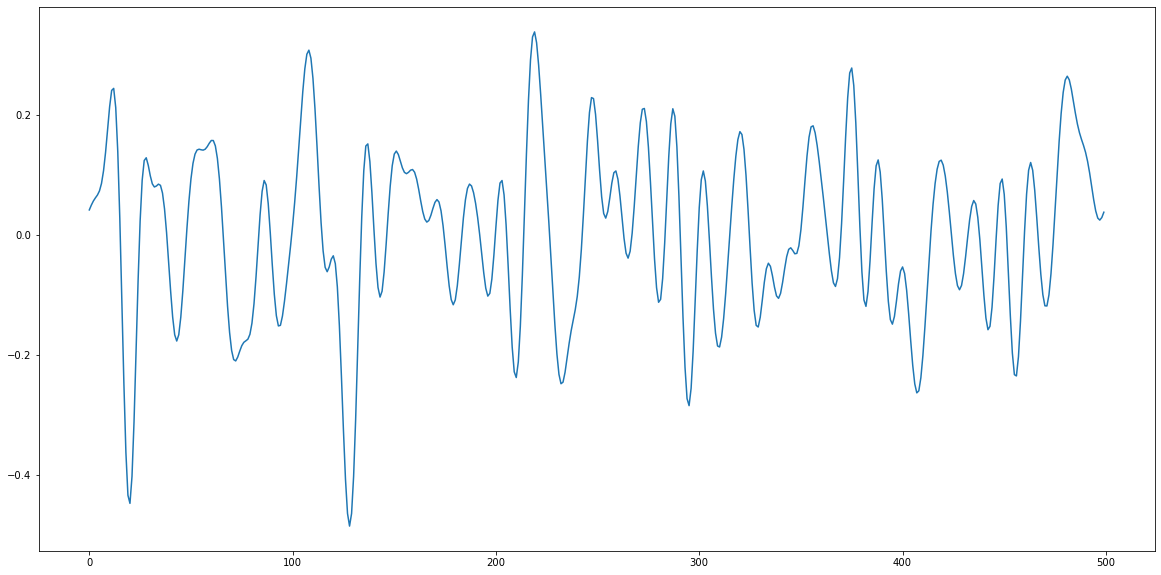

In [2]:
## random plot the index 

idx = 10
labels = pd.read_csv('data/bagData/Labels_all.csv')

print(labels.iloc[idx]['binary'])
print(labels.iloc[idx]['filenames'])
filename = labels.iloc[idx]['filenames']
data = np.load('data/bagData/'+filename).astype(np.float64)

fig=plt.figure(figsize=(20,10))
plt.plot((data[18,:,0]))

In [4]:
data[]

(180, 500, 12)

In [13]:
PATH_featureFiles = 'data/feature_bag_data' 

filesList = glob.glob(PATH_featureFiles+'/*.npy')

# check dimension
first = np.load(filesList[0])
first.shape

(180, 5, 12)

## Feature extraction

In [14]:
## calculate the dominant frequency, for eacah window for each file and save them into 
## 180 x 5 x 12 arrays (12 is for the sensors - 6 for each side)

## call function if needed. 
def featureExtraction():
    # features
    labels = pd.read_csv('data/bagData/Labels_all.csv')

    sr = 100 
    for idx in range(len(labels)):

        filename = labels.iloc[idx]['filenames']
        data = np.load('data/bagData/'+filename).astype(np.float64)

        a = torch.empty((180,5,12))

        for idj in range(data.shape[2]):

            for idk in range(data.shape[0]):

                f, spec = welch(data[idk,:,idj], fs=sr, nperseg=sr )

                selected = np.logical_and(f>3.5,f<7.5)

                spec = np.mean(np.log(spec[selected])) # mean frequency in tremor-spectrum 

                rms = np.sqrt(np.mean(data[idk,:,idj]**2)) # RMS 

                kurtosis_ = kurtosis(data[idk,:,idj]) # Kurtosis 

                entropySpec = ant.spectral_entropy(data[idk,:,idj], sf=sr, method='welch', normalize=True)  # Approximate entropy 

                entropy = ant.app_entropy(data[idk,:,idj])  # Approximate entropy 

        a[idk,0,idj] = spec
        a[idk,1,idj] = rms
        a[idk,2,idj] = kurtosis_
        a[idk,3,idj] = entropySpec
        a[idk,4,idj] = entropy

        np.save('data/feature_bag_data2/'+'feature_'+filename, a)

In [29]:
## call function if needed. 
def featureExtraction(data):    
    sr = 100 

    a = torch.empty((180,5*12))

    for idj in range(data.shape[0]):
        
        spec = torch.empty((12,))
        rms = torch.empty((12,))
        kurtosis_= torch.empty((12,))
        entropySpec = torch.empty((12,))
        entropy = torch.empty((12,))
        
        for idk in range(data.shape[2]):
            
            f, specc = welch(data[idj,:,idk], fs=sr, nperseg=sr )
            
            selected = np.logical_and(f>3.5,f<7.5)
            
            spec[idk] = np.mean(np.log(specc[selected])) # mean frequency in tremor-spectrum 

            rms[idk] = np.sqrt(np.mean(data[idj,:,idk]**2)) # RMS 

            kurtosis_[idk] = kurtosis(data[idj,:,idk]) # Kurtosis 

            entropySpec[idk] = ant.spectral_entropy(data[idj,:,idk], sf=sr, method='welch', normalize=True)  # Approximate entropy 

            entropy[idk] = ant.app_entropy(data[idj,:,idk])  # Approximate entropy 

    
        a[idj,0:12] = spec
        a[idj,12:12*2]= rms
        a[idj,12*2:12*3] = kurtosis_
        a[idj,12*3:12*4] = entropySpec
        a[idj,12*4:12*5] = entropy
    return a

In [30]:
labels = pd.read_csv('data/bagData/Labels_all.csv')
sr = 100 
for idx in range(len(labels)):
        
        filename = labels.iloc[idx]['filenames']
        data = np.load('data/bagData/'+filename).astype(np.float64)
        a = featureExtraction(data)
        np.save('data/feature_bag_data2/'+'feature_'+filename, a)



In [6]:
a = torch.empty((180,5*12))


In [15]:
a[0,0:12] = 1
a[0,12:12*2]= 2
a[0,12*2:12*3]=3
a[0,12*3:12*4] = 4
a[0,12*4:12*5] = 5






In [17]:
a[0,:]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5.])

In [13]:
a[0,0:12] 

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
a[0,12:12*2]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
spec = torch.empty((12))



In [26]:
a[0,0:12] = spec

In [27]:
spec[1] =2 

In [28]:
spec

tensor([0.0000e+00, 2.0000e+00, 0.0000e+00, 3.6893e+19, 1.1210e-44, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [2]:
import numpy as np

# Create input of real sine wave
fs = 1.0
fc = 0.25
n = np.arange(0, 300)
x = np.cos(2*sp.pi*n*fc/fs)

# Rearrange x into 10 30 second windows
x = np.reshape(x, (-1, 30))

# Calculate power over each window [J/s]
p = np.sum(x*x, 1)/x.size

# Calculate energy [J = J/s * 30 second]
e = p*x.size

In [3]:
e

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15.])

In [4]:
p

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])